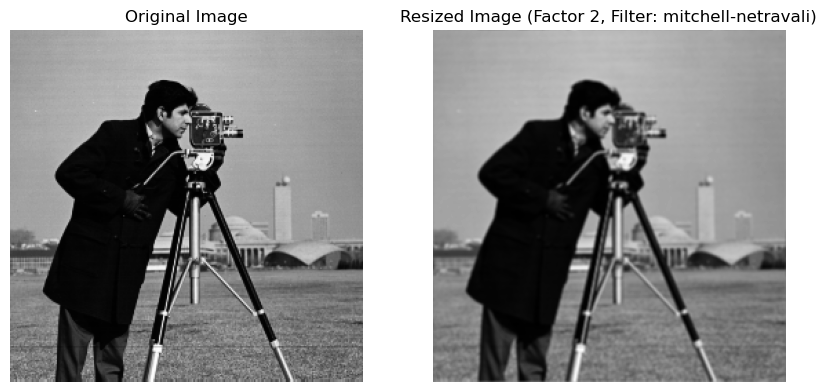

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def resize_filter(I, factor, filt):
    # Define filter kernels based on the provided filter type
    if filt == 'bell':
        kernel = np.array([1/2 * (1 + np.cos(np.pi * x / 3)) if abs(x) < 3 else 0 for x in range(-factor, factor + 1)])
    elif filt == 'tent':
        kernel = np.array([(1 - abs(x)) if abs(x) <= 1 else 0 for x in np.linspace(-factor, factor, 2*factor + 1)])
    elif filt == 'mitchell-netravali':
        B = 1/3
        C = 1/3
        kernel = np.array([(16/18) * ((4/6) * abs(x) - (7/6) * abs(x)**3) + (69/18) * ((1/6) * abs(x)**2 - (2/6) * abs(x) + (4/6)) if abs(x) < 2 else 0 for x in np.linspace(-factor, factor, 2*factor + 1)])
    else:
        raise ValueError("Unknown filter type. Supported filters: 'bell', 'tent', 'mitchell-netravali'")
    
    # Normalize the kernel
    kernel /= np.sum(kernel)
    
    # Perform convolution in rows
    I_conv_row = convolve2d(I, np.expand_dims(kernel, axis=0), mode='same', boundary='wrap')
    
    # Perform convolution in columns
    I_conv_col = convolve2d(I_conv_row, np.expand_dims(kernel, axis=1), mode='same', boundary='wrap')
    
    return I_conv_col

# Example usage:
# Load an example image
I = plt.imread("cameraman.png")  # Replace "cameraman.png" with your image file path

# Resize the image using the specified filter type
factor = 2
filter_type = 'mitchell-netravali'  # Choose from 'bell', 'tent', 'mitchell-netravali'
I_resized = resize_filter(I, factor, filter_type)

# Display the original and resized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(I_resized, cmap='gray')
axes[1].set_title("Resized Image (Factor {}, Filter: {})".format(factor, filter_type))
axes[1].axis('off')
plt.show()
